https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240
https://www.mygreatlearning.com/blog/understanding-curse-of-dimensionality/

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

In [218]:
#reading in the dataset
df = pd.read_csv("C:\\Users\\naja\\Desktop\\stroke-prediction-project\\data\\healthcare-dataset-stroke-data.csv")
print(df.shape)
df = df.dropna()
df = df[df['gender'] != 'Other']
df = df.reset_index(drop=True)
df = df.drop(columns = ["id"])

(5110, 12)


In [219]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [220]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [221]:
#df = pd.get_dummies(df, columns = ["work_type","smoking_status"])
df = df.drop(columns = ["work_type","smoking_status"])
df.shape

(4908, 6)

In [222]:
scaled_df = StandardScaler().fit_transform(df)

In [223]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(scaled_df)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Explained variation per principal component: [0.25636229 0.17719637]
Cumulative variance explained by 2 principal components: 43.36%


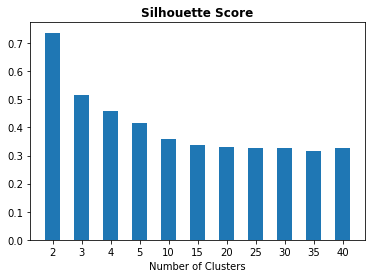

In [224]:
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]

# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []

# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(df)          # fit model on dataset, this will find clusters based on parameter p
    ss = silhouette_score(df, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    #print('Parameter:', p, 'Score', ss.round(3))
    
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
        
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [200]:
kmeans = KMeans(n_clusters=2)    
kmeans.fit(scaled_df)
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

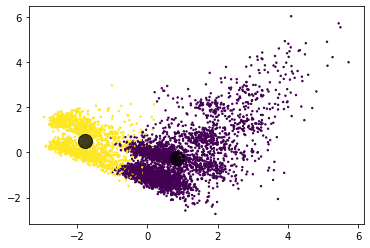

In [201]:
y_kmeans = kmeans.predict(scaled_df) #labels 

x = pca_2_result[:, 0]
y = pca_2_result[:, 1]

plt.scatter(x, y, c=y_kmeans, s=2, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=200, alpha=0.75);